In [1]:
from setup_fitting import load_data, init_optimize_df, infer_signal, const_params, var_params, stratifiers, param_bounds, ABUNDANCE_COLS, AFFINITY_COLS, RCPS
from fit import fit
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = load_data()
df

,Tube #,Donor,Incubation time (hr),Cells,Cetuximab Variant,Cetuximab Concentration (ug/ml),Cytokine,Response
0,10,2,2,NK cells + A549,-,0,IFN-γ,193.395592
1,11,2,2,NK cells + A549,WT,0.01,IFN-γ,661.843404
2,12,2,2,NK cells + A549,G236A,0.01,IFN-γ,483.266052
3,13,2,2,NK cells + A549,A330L I332E,0.01,IFN-γ,2519.892383
4,14,2,2,NK cells + A549,G236A A330L I332E,0.01,IFN-γ,2844.571776
...,...,...,...,...,...,...,...,...
463,58,2,4,NK cells only,-,-,MIP-1β,189.468948
464,273,4,2,NK cells only,-,-,MIP-1β,87.775258
465,275,4,4,NK cells only,-,-,MIP-1β,146.350116
466,368,5,2,NK cells only,-,-,MIP-1β,140.994530


In [2]:
opt_df = init_optimize_df(df)
opt_df


,Tube #,donor,time,variant,conc,cytokine,signal,log_aff_FcgRIIIA-158V,eff_cancer_cell_valency,log_rbound_signal_coeff,log_abund_FcgRIIIA-158V,log_KxStar
0,11,2,2,WT,1.000000e-11,IFN-γ,139.882731,5.530200,5.0,-2.0,3.30103,-12.0
1,12,2,2,G236A,1.000000e-11,IFN-γ,0.000000,5.749736,5.0,-2.0,3.30103,-12.0
2,13,2,2,A330L I332E,1.000000e-11,IFN-γ,1997.931710,6.262451,5.0,-2.0,3.30103,-12.0
3,14,2,2,G236A A330L I332E,1.000000e-11,IFN-γ,2322.611103,7.000000,5.0,-2.0,3.30103,-12.0
4,15,2,2,WT,1.000000e-09,IFN-γ,842.437412,5.530200,5.0,-2.0,3.30103,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179,343,5,4,G236A A330L I332E,1.000000e-11,MIP-1β,22769.160337,7.000000,5.0,-2.0,3.30103,-12.0
180,344,5,4,WT,1.000000e-09,MIP-1β,14093.218782,5.530200,5.0,-2.0,3.30103,-12.0
181,345,5,4,G236A,1.000000e-09,MIP-1β,9062.187704,5.749736,5.0,-2.0,3.30103,-12.0
182,346,5,4,A330L I332E,1.000000e-09,MIP-1β,26725.416395,6.262451,5.0,-2.0,3.30103,-12.0


In [3]:
result = fit(opt_df, const_params, var_params, stratifiers, param_bounds, infer_signal)
result

Fitting 3 parameters with 184 points.
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0650e+10                                    5.77e+06    
       1              2         1.0618e+10      3.18e+07       4.98e+01       6.24e+07    
       2              3         1.0576e+10      4.26e+07       1.63e+01       9.87e+07    
       3              4         1.0467e+10      1.08e+08       1.71e+01       1.09e+08    
       4              5         1.0260e+10      2.07e+08       9.93e+00       2.44e+07    
       5              6         1.0223e+10      3.74e+07       1.82e+00       3.25e+06    
       6              7         1.0219e+10      3.38e+06       4.49e-02       6.28e+04    
       7              8         1.0219e+10      6.34e+04       4.90e-04       3.31e+02    
       8              9         1.0219e+10      3.34e+02       2.55e-06       1.66e+00    
       9             10         1.0219e+10      1.68

,conc,log_KxStar,signal,log_aff_FcgRIIIA-158V,donor,time,variant,cytokine,Tube #,log_abund_FcgRIIIA-158V,log_rbound_signal_coeff,eff_cancer_cell_valency,signal_inferred,se
0,1.000000e-11,-12.0,139.882731,5.530200,2,2,WT,IFN-γ,11,3.30103,-1.417139e-11,100.0,0.724774,1.936494e+04
1,1.000000e-11,-12.0,0.000000,5.749736,2,2,G236A,IFN-γ,12,3.30103,-1.417139e-11,100.0,1.255344,1.575889e+00
2,1.000000e-11,-12.0,1997.931710,6.262451,2,2,A330L I332E,IFN-γ,13,3.30103,-1.417139e-11,100.0,5.236090,3.970836e+06
3,1.000000e-11,-12.0,2322.611103,7.000000,2,2,G236A A330L I332E,IFN-γ,14,3.30103,-1.417139e-11,100.0,119.015932,4.855832e+06
4,1.000000e-09,-12.0,842.437412,5.530200,2,2,WT,IFN-γ,15,3.30103,-1.417139e-11,100.0,69.810949,5.969517e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1.000000e-11,-12.0,22769.160337,7.000000,5,4,G236A A330L I332E,MIP-1β,343,3.30103,-1.299589e-12,100.0,119.015932,5.130290e+08
180,1.000000e-09,-12.0,14093.218782,5.530200,5,4,WT,MIP-1β,344,3.30103,-1.299589e-12,100.0,69.810949,1.966560e+08
181,1.000000e-09,-12.0,9062.187704,5.749736,5,4,G236A,MIP-1β,345,3.30103,-1.299589e-12,100.0,117.473871,8.000791e+07
182,1.000000e-09,-12.0,26725.416395,6.262451,5,4,A330L I332E,MIP-1β,346,3.30103,-1.299589e-12,100.0,393.226656,6.933842e+08


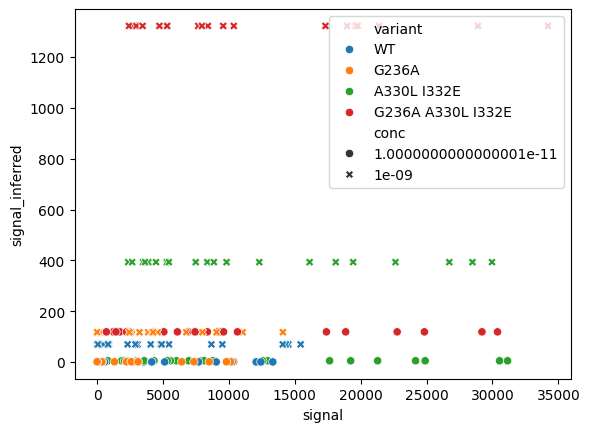

In [4]:
# plot signal vs inferred signal
sns.scatterplot(x="signal", y="signal_inferred", data=result, hue="variant", style="conc")
plt.show()

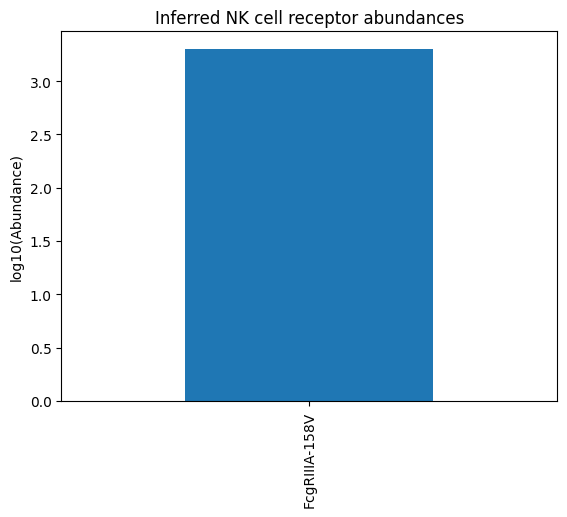

FcgRIIIA-158V    3.30103
Name: 0, dtype: float64


In [5]:
# assert abundances in each row are equal
assert result[ABUNDANCE_COLS].iloc[0].equals(result[ABUNDANCE_COLS].iloc[1])
# plot abundances as barplot
abundances = result[ABUNDANCE_COLS].iloc[0]
# rename abundances to receptor names
abundances.rename(index={abund: rcp for abund, rcp in zip(ABUNDANCE_COLS, RCPS)}, inplace=True)
# plot
ax = abundances.plot(kind="bar")
ax.set_ylabel("log10(Abundance)")
ax.set_title("Inferred NK cell receptor abundances")
plt.show()
# print these values
print(abundances)

Text(0.5, 1.0, 'Affinities by variant (not fit)')

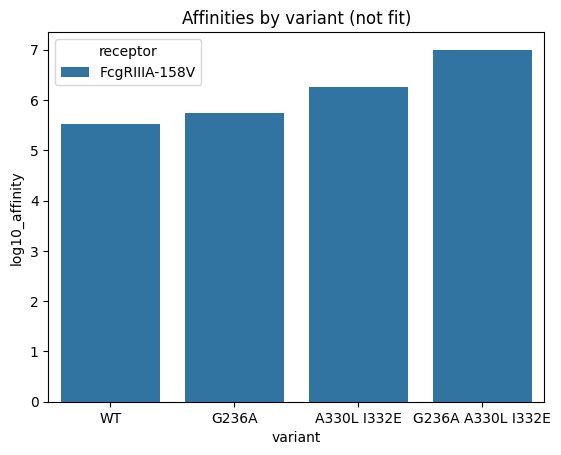

In [6]:
# plot affinities by variant, requiring melt
affinities = result[AFFINITY_COLS + ["variant"]]
affinities_melted = affinities.melt(id_vars=["variant"], value_vars=AFFINITY_COLS, var_name="receptor", value_name="log10_affinity")
# rename columns to receptor names
affinities_melted.replace({aff: rcp for aff, rcp in zip(AFFINITY_COLS, RCPS)}, inplace=True)
ax = sns.barplot(x="variant", y="log10_affinity", hue="receptor", data=affinities_melted)
ax.set_title("Affinities by variant (not fit)")

In [7]:
print("eff_cancer_cell_valency: ", result["eff_cancer_cell_valency"].iloc[0])

eff_cancer_cell_valency:  99.99999999970643


['WT' 'G236A' 'A330L I332E' 'G236A A330L I332E']


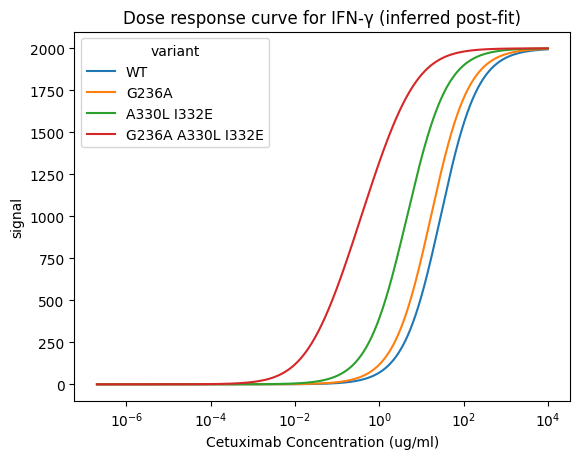

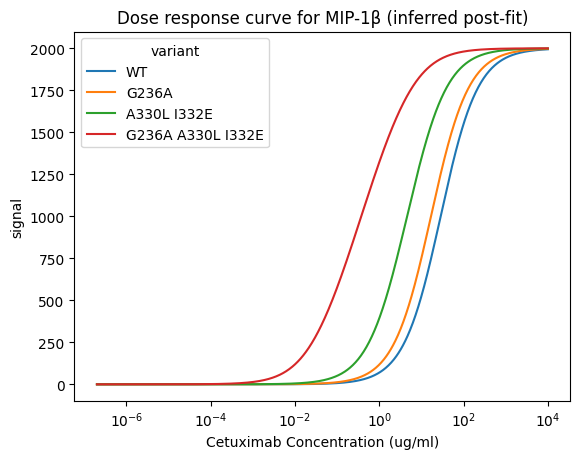

In [15]:
# interpolate / extrapolate model to other Ab concentrations 
result_polate_frame = result.copy().drop(columns=["signal_inferred", "se", "signal"])

variants = result_polate_frame["variant"].unique()
print(variants)

dfs = []
for variant in variants:
    cytokines = result_polate_frame["cytokine"].unique()
    for cytokine in cytokines:
        variant_frame_df = result_polate_frame[(result_polate_frame["variant"] == variant) & (result_polate_frame["cytokine"] == cytokine)]

        # generate a range of Ab concentrations
        ab_conc_range = np.logspace(np.log10(result["conc"].min()) - 4.7, np.log10(result["conc"].max()) + 4, 1000, base=10)

        # make rows for each concentration, copying all other values
        for ab_conc in ab_conc_range:
            # get first 
            new_row = variant_frame_df.iloc[0].copy()
            new_row["conc"] = ab_conc
            dfs.append(new_row)

# combine dfs
result_polate = pd.DataFrame(dfs).reset_index(drop=True)

result_polate["signal"] = infer_signal(result_polate)

for cytokine in result_polate["cytokine"].unique():
    cytokine_df = result_polate[result_polate["cytokine"] == cytokine].copy()
    cytokine_df["conc"] = cytokine_df["conc"] * 1e9
    # plot dose response curve
    ax = sns.lineplot(x="conc", y="signal", hue="variant", data=cytokine_df)
    ax.set_title(f"Dose response curve for {cytokine} (inferred post-fit)")
    ax.set_xscale("log")
    ax.set_xlabel("Cetuximab Concentration (ug/ml)")
    plt.show()

IFN-γ
variant WT
xticks [0, 1]
IFN-γ
variant G236A
xticks [0, 1]
IFN-γ
variant A330L I332E
xticks [0, 1]
IFN-γ
variant G236A A330L I332E
xticks [0, 1]


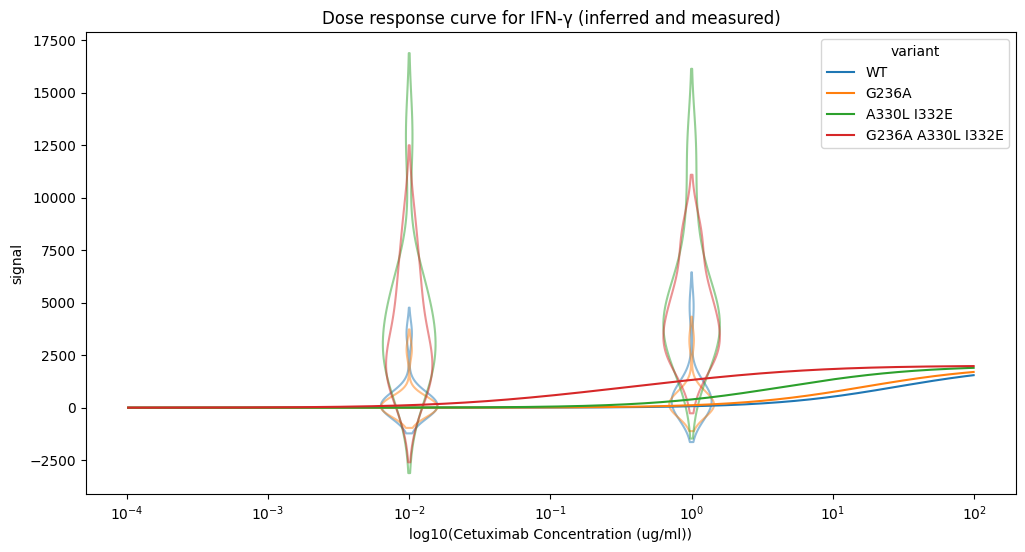

MIP-1β
variant WT
xticks [0, 1]
MIP-1β
variant G236A
xticks [0, 1]
MIP-1β
variant A330L I332E
xticks [0, 1]
MIP-1β
variant G236A A330L I332E
xticks [0, 1]


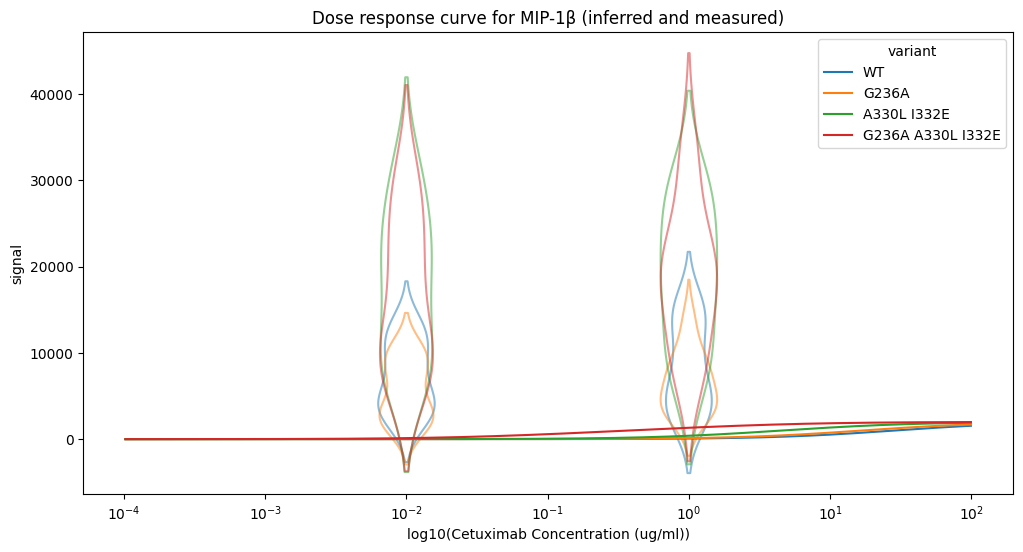

In [75]:
# overlay real data

# stack result_polate and result, making sure they are labeled
result_polate["source"] = "inferred"
result_copy = result.drop(columns=["signal_inferred", "se"])
result_copy["source"] = "measured"
result_stack = pd.concat([result_polate[(result_polate["conc"] >= 1e-11 / 100) & (result_polate["conc"] <= 1e-9 * 100)], result_copy])

result_stack["conc"] = result_stack["conc"] * 1e9
# append "inferred" to the variant column for all rows in result_stack where source is "inferred"
# result_stack.loc[result_stack["source"] == "inferred", "variant"] = result_stack.loc[result_stack["source"] == "inferred", "variant"] + " (i)"


result_stack["conc"] = np.log10(result_stack["conc"])
result_stack["conc"] /= 2
result_stack["conc"] += 1
for cytokine in result_stack["cytokine"].unique():
    cytokine_df = result_stack[result_stack["cytokine"] == cytokine].copy()

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    min_conc = variant_df[variant_df["source"] == "measured"]["conc"].min()
    for variant in cytokine_df["variant"].unique():
        variant_df = cytokine_df[cytokine_df["variant"] == variant]
        # violin plot of measured values. the different variants should be overlayed
        sns.violinplot(x="conc", y="signal", data=variant_df[variant_df["source"] == "measured"],
                    ax=ax, alpha=0.5, fill=False, inner=None, width=0.2)
        print(cytokine)
        print("variant", variant)
        print("xticks", ax.get_xticks())


    inferred_df = cytokine_df[cytokine_df["source"] == "inferred"].copy()

    # xrange = (-4, 2)
    # ax.set_xlim(*xrange)
    xticks = np.arange(-2, 3, 0.5)
    ax.set_xticks(xticks)
    xticklabels_exp = (xticks - 1) * 2
    ax.set_xticklabels(["$10^{" + str(round(tick)) + "}$" for tick in xticklabels_exp])

    # # Plot inferred as lineplot
    sns.lineplot(x="conc", y="signal", hue="variant", data=inferred_df, ax=ax)

    ax.set_xlabel("log10(Cetuximab Concentration (ug/ml))")

    ax.set_title(f"Dose response curve for {cytokine} (inferred and measured)")
    # plt.tight_layout()
    plt.show()